# First checks

In [6]:
import openslide
import os
os.environ['CONDA_DLL_SEARCH_MODIFICATION_ENABLE'] = '1'
import numpy as np

In [7]:
path = r"F:\GBMatch-DL\GBMatch_histo_lib_complete\Primary OP\pat_001_1_N1168-05A_histo.ndpi"
wsi = openslide.OpenSlide(path)

In [8]:
wsi.level_count

9

In [9]:
wsi.dimensions

(126976, 104704)

In [10]:
wsi.level_dimensions

((126976, 104704),
 (63488, 52352),
 (31744, 26176),
 (15872, 13088),
 (7936, 6544),
 (3968, 3272),
 (1984, 1636),
 (992, 818),
 (496, 409))

In [11]:
wsi.level_downsamples

(1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0)

In [12]:
wsi.properties

<_PropertyMap {'hamamatsu.AHEX[0]': '34472057A8252C57146FAC2B345F1477A83D2C331837A8032C571867A82F245F1077A43524471057A423184B00679C272043005BA0272C43145FA4272817082FA4002C230C3FA80B381F1433A8072C2F143FA8113037183FA411382B183FAC193AE9', 'hamamatsu.AHEX[0].fluorescence': '68434063C035601F3C3FC40D683B385BC0296027383FC0136023342BC007582F283BBC11501F282FBC0D50131C2BB400590B2017B9175C0B301FBD03602F284FBC29641B302BC01568073027C1036037344FC02F6417343FBC19681B383BC413E30D', 'hamamatsu.AHEX[0].ploidy': '584F306FBC3F502B2847BC1958472467B8355037204BB81B502B202FB803483B1443B41140271437B00F381F0033A80340000423AD154817142FB103483F0C5BB0274C271037B01350171037B400484B1063B4374C27144FB01F542B184FB8195AC4', 'hamamatsu.AHEX[1]': '3C4B2C53B02538572467B42B3C63246FB03D38332437B00538572467B02F305F1C77AC3730472057AC23284B1063A0292C47105BA8273847205BA8293817142FA80338271C3FB00F44272037B00B38332043B0153C3F2443AC15442F283FB01D4724', 'hamamatsu.AHEX[1].fluorescence': '6047346FB83B58273047BC1160432C63B82D582F284BB8

In [13]:
wsi.associated_images

<_AssociatedImageMap {}>

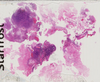

In [14]:
wsi.get_thumbnail((100, 100))

In [15]:
np.array(wsi.level_dimensions[-1])*wsi.level_downsamples[-1]

array([126976., 104704.])

# Colour deconvolution

In [16]:
from numpy.linalg import norm

In [17]:
size = wsi.level_dimensions[-1]
image = np.array(wsi.get_thumbnail(size))
image

array([[[215, 212, 207],
        [204, 201, 196],
        [199, 196, 191],
        ...,
        [194, 191, 184],
        [205, 202, 195],
        [203, 200, 193]],

       [[181, 181, 179],
        [172, 172, 170],
        [130, 130, 128],
        ...,
        [190, 187, 180],
        [199, 196, 189],
        [196, 193, 186]],

       [[ 98,  98,  98],
        [ 61,  61,  61],
        [ 95,  95,  95],
        ...,
        [209, 206, 199],
        [213, 210, 203],
        [210, 207, 200]],

       ...,

       [[199, 207, 210],
        [201, 205, 206],
        [202, 203, 198],
        ...,
        [224, 223, 218],
        [223, 222, 217],
        [223, 222, 217]],

       [[195, 205, 217],
        [189, 194, 200],
        [197, 196, 194],
        ...,
        [224, 223, 218],
        [223, 222, 217],
        [223, 222, 217]],

       [[224, 219, 216],
        [227, 223, 220],
        [225, 224, 220],
        ...,
        [223, 222, 218],
        [222, 218, 215],
        [226, 221, 218]]

In [18]:
v1 = np.array([0.644, 0.72, 0.27])
v2 = np.array([0.07, 0.99, 0.11])
v3 = np.array([0.636, 0.001, 0.772])

ODmatrix = np.array([v1/norm(v1), v2/norm(v2), v3/norm(v3)])
ODmatrix

array([[0.64206516, 0.71783683, 0.26918881],
       [0.07010172, 0.99143863, 0.11015985],
       [0.6358471 , 0.00099976, 0.7718144 ]])

In [19]:
im_log = -np.log(np.array(image)/255.).reshape(-1, 3) 
im_log

array([[0.17062552, 0.18467727, 0.20854475],
       [0.22314355, 0.23795864, 0.26314889],
       [0.24795872, 0.26314889, 0.28899012],
       ...,
       [0.13409177, 0.13858616, 0.15676848],
       [0.13858616, 0.15676848, 0.17062552],
       [0.12072855, 0.14310084, 0.15676848]])

In [20]:
fin = np.exp(-(np.linalg.solve(ODmatrix.T, im_log.T).T.reshape(image.size)))
fin

array([0.9939049 , 0.8339338 , 0.78493947, ..., 1.01259037, 0.85795094,
       0.83059463])

In [21]:
fin.min()

0.022706707790119997

In [22]:
fin[fin>1] = 1
fin

array([0.9939049 , 0.8339338 , 0.78493947, ..., 1.        , 0.85795094,
       0.83059463])

In [24]:
from wsi_utils import colour_deconvolution
import time

In [19]:
cd = colour_deconvolution(image, 'HE')
cd

array([[[243, 218, 210],
        [236, 211, 200],
        [233, 207, 195],
        ...,
        [233, 201, 188],
        [240, 209, 198],
        [239, 208, 196]],

       [[211, 206, 186],
        [204, 199, 178],
        [173, 168, 139],
        ...,
        [231, 199, 184],
        [237, 205, 192],
        [235, 203, 190]],

       [[142, 145, 111],
        [107, 110,  74],
        [140, 142, 108],
        ...,
        [243, 212, 201],
        [245, 214, 205],
        [243, 212, 202]],

       ...,

       [[204, 242, 218],
        [213, 232, 213],
        [229, 218, 202],
        ...,
        [245, 228, 220],
        [245, 227, 219],
        [245, 227, 219]],

       [[186,   1, 230],
        [196, 233, 211],
        [223, 214, 200],
        ...,
        [245, 228, 220],
        [245, 227, 219],
        [245, 227, 219]],

       [[248, 222, 218],
        [248, 226, 222],
        [244, 230, 222],
        ...,
        [243, 229, 220],
        [245, 223, 218],
        [249, 223, 220]]

In [32]:
from PIL import Image

In [55]:
path2 = r"F:\GBMatch-DL\jpeg\incl_unmeth_x20_jpeg\pat_002_1_N380-09B_histo_x20\pat_002_1_N380-09B_histo_3.jpeg"
image2 = Image.open(path2)

In [46]:
start = time.time()
im_log2 = -np.log(np.array(image2)/255.).reshape(-1, 3) 

end = time.time()

np.linalg.solve(ODmatrix.T, im_log2.T).T.reshape(image2.shape)

print(end-start)

0.051001548767089844


In [63]:
start = time.time()
cd = colour_deconvolution(image2, 'HE')
end = time.time()
print(end-start)

0.3154923915863037


# Tissue masking

In [12]:
import openslide
import os
os.environ['CONDA_DLL_SEARCH_MODIFICATION_ENABLE'] = '1'
import numpy as np
#from wsi_utils import colour_deconvolution
#from wsi_utils import binary_disk
import matplotlib.pyplot as plt
from scipy.ndimage import binary_closing
from scipy.ndimage import binary_erosion
from wsi_utils import *
from PIL import Image

from skimage.measure import label, regionprops

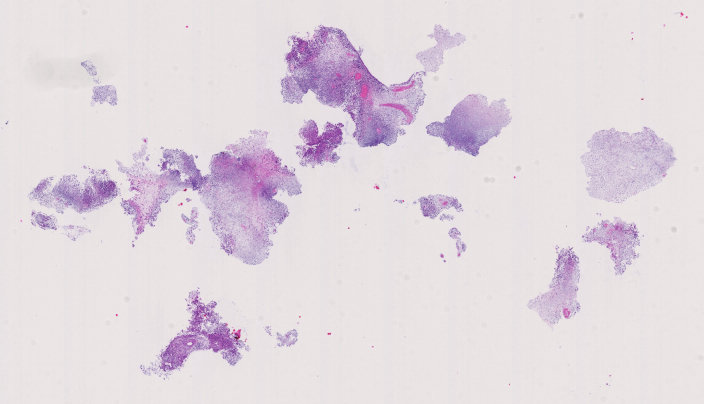

In [13]:
#path = r"F:\GBMatch-DL\GBMatch_histo_lib_complete\Primary OP\pat_001_1_N1168-05A_histo.ndpi"
#path = r"F:\GBMatch-DL\GBMatch_histo_lib_complete\Primary OP\pat_017_1_N1223-15_histo.ndpi"
path = r"F:\GBMatch-DL\GBMatch_histo_lib_complete\Primary OP\pat_210_1_N296-09_histo.ndpi"
wsi = openslide.OpenSlide(path)
size = wsi.level_dimensions[-3]
image = wsi.get_thumbnail(size)
image

In [14]:
cd = colour_deconvolution(image, 'HE')
H = cd[:,:,0]
E = cd[:,:,1]
tissue_mask = ((H+E*1.)/2) < 200

y,x = np.ogrid[-3:3+1, -3:3+1]
struct = x**2+y**2 <= 3**2

tissue_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [15]:
H.max()

255

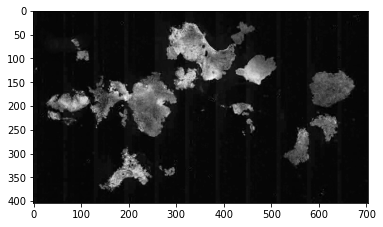

In [16]:
H = cd[:,:,0]
plt.imshow(H, cmap = 'Greys')

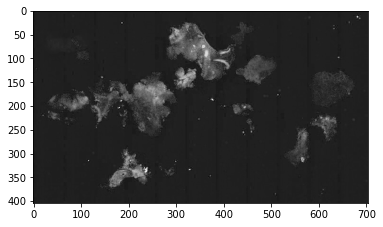

In [17]:
E = cd[:,:,1]
plt.imshow(E, cmap = 'Greys')

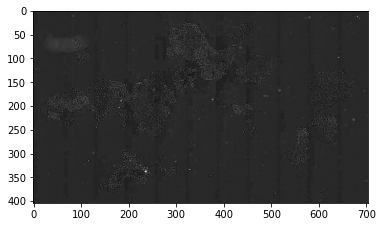

In [18]:
res = cd[:,:,2]
plt.imshow(res, cmap = 'Greys')

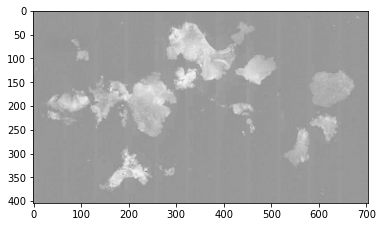

In [19]:
greymask = (H/2.+E/2.)/res
plt.imshow(greymask, cmap='Greys')

In [20]:
greymask.min()

0.38311688311688313

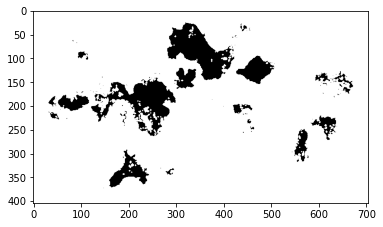

In [21]:
mask = binary_erosion(greymask < 0.93)
plt.imshow(mask, cmap='Greys')

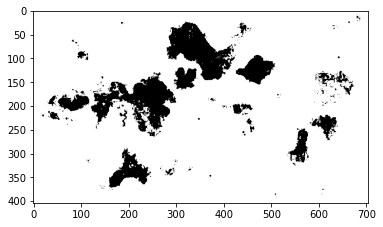

In [22]:
mask = (H/res < 0.85) + (E/res < 0.95) 
plt.imshow(mask, cmap='Greys')

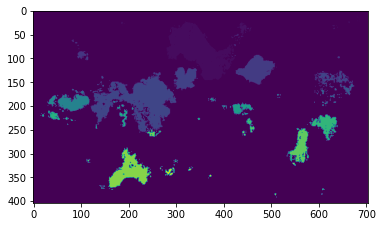

In [23]:
label_mask = label(mask)
plt.imshow(label_mask)

In [44]:
coords = []

regions = regionprops(label_mask)
for i, r in enumerate(regions):
    if r.area>100:
        #print(r.coords)
        #coords = np.concatenate((coords, r.coords))
        coords.append(r.coords)
coords = np.concatenate(coords)

mask_filtered = np.zeros_like(mask)

for coord in coords:
    x,y = coord#print(coord)
    mask_filtered[x,y] = True


In [45]:
coords

array([[  9, 112],
       [  9, 113],
       [ 10, 109],
       ...,
       [370,  64],
       [370,  65],
       [370,  66]], dtype=int64)

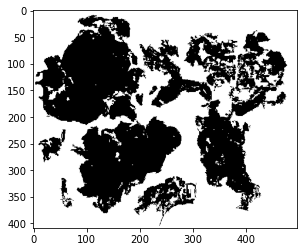

In [35]:
plt.imshow(mask_filtered, cmap='Greys')

In [85]:
mask_filtered

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

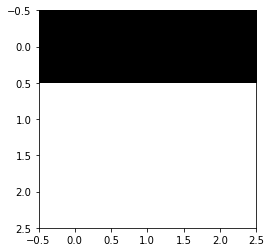

In [16]:
test = np.zeros((3,3))
test[[0,0]] = 1
plt.imshow(test, cmap='Greys')

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [47]:
coords.squeeze()

array([[  9, 112],
       [  9, 113],
       [ 10, 109],
       ...,
       [370,  64],
       [370,  65],
       [370,  66]], dtype=int64)

In [42]:
coords = np.empty((1,2))
coords

array([[1.26491479e-311, 0.00000000e+000]])

In [10]:
Image.fromarray(greymask < 1).save('images/mask.png')

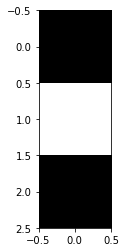

In [11]:
plt.imshow(np.array([[255], [0], [255]]), cmap='Greys')

In [12]:
y,x = np.ogrid[-3:3+1, -3:3+1]
struct = x**2+y**2 <= 3**2
struct

array([[False, False, False,  True, False, False, False],
       [False,  True,  True,  True,  True,  True, False],
       [False,  True,  True,  True,  True,  True, False],
       [ True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True, False],
       [False,  True,  True,  True,  True,  True, False],
       [False, False, False,  True, False, False, False]])

In [42]:
x**2 + y**2

array([[18, 13, 10,  9, 10, 13, 18],
       [13,  8,  5,  4,  5,  8, 13],
       [10,  5,  2,  1,  2,  5, 10],
       [ 9,  4,  1,  0,  1,  4,  9],
       [10,  5,  2,  1,  2,  5, 10],
       [13,  8,  5,  4,  5,  8, 13],
       [18, 13, 10,  9, 10, 13, 18]], dtype=int32)

## Testing the final function

In [1]:
from wsi_handler import WSIHandler
import matplotlib.pyplot as plt

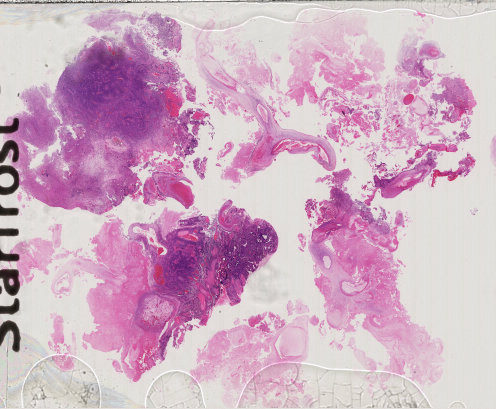

In [2]:
path = r"F:\GBMatch-DL\GBMatch_histo_lib_complete\Primary OP\pat_001_1_N1168-05A_histo.ndpi"
wsi = WSIHandler(path)
wsi.get_thumbnail()

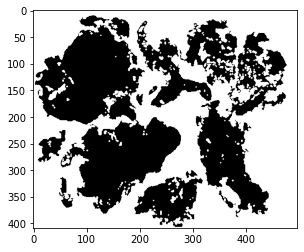

In [3]:
tissue_mask = wsi.segment_tissue()
plt.imshow(tissue_mask, cmap='Greys')

In [4]:
wsi.get_thumbnail().size

(496, 409)

In [5]:
tissue_mask.shape

(409, 496)

# Read NDPA

In [66]:
import openslide
import os
os.environ['CONDA_DLL_SEARCH_MODIFICATION_ENABLE'] = '1'
import numpy as np
#from wsi_utils import colour_deconvolution
#from wsi_utils import binary_disk
import matplotlib.pyplot as plt
from scipy.ndimage import binary_closing
from wsi_utils import *
from PIL import Image
import xml.etree.ElementTree as ET

from PIL import Image, ImageDraw
from skimage.measure import label, regionprops

In [12]:
path = r"F:\GBMatch-DL\GBMatch_histo_lib_complete\Primary OP\pat_001_1_N1168-05A_histo.ndpi"
wsi = openslide.OpenSlide(path)

In [23]:
wsi.properties

<_PropertyMap {'hamamatsu.AHEX[0]': '34472057A8252C57146FAC2B345F1477A83D2C331837A8032C571867A82F245F1077A43524471057A423184B00679C272043005BA0272C43145FA4272817082FA4002C230C3FA80B381F1433A8072C2F143FA8113037183FA411382B183FAC193AE9', 'hamamatsu.AHEX[0].fluorescence': '68434063C035601F3C3FC40D683B385BC0296027383FC0136023342BC007582F283BBC11501F282FBC0D50131C2BB400590B2017B9175C0B301FBD03602F284FBC29641B302BC01568073027C1036037344FC02F6417343FBC19681B383BC413E30D', 'hamamatsu.AHEX[0].ploidy': '584F306FBC3F502B2847BC1958472467B8355037204BB81B502B202FB803483B1443B41140271437B00F381F0033A80340000423AD154817142FB103483F0C5BB0274C271037B01350171037B400484B1063B4374C27144FB01F542B184FB8195AC4', 'hamamatsu.AHEX[1]': '3C4B2C53B02538572467B42B3C63246FB03D38332437B00538572467B02F305F1C77AC3730472057AC23284B1063A0292C47105BA8273847205BA8293817142FA80338271C3FB00F44272037B00B38332043B0153C3F2443AC15442F283FB01D4724', 'hamamatsu.AHEX[1].fluorescence': '6047346FB83B58273047BC1160432C63B82D582F284BB8

In [137]:
def nm2pix(nm, OffsetFromSlideCenter, mpp, objectivePower, magnification, image_size):
    nm_coord = nm - OffsetFromSlideCenter
    pixel_coord = nm_coord/(mpp*1000)
    pixel_coord = pixel_coord/(objectivePower/magnification)
    pixel_coord = pixel_coord + np.round(image_size/2)
    pixel_coord = int(np.round(pixel_coord))
    return pixel_coord

In [58]:
mppX = float(wsi.properties['openslide.mpp-x'])
mppY = float(wsi.properties['openslide.mpp-y'])

objectivePower = int(wsi.properties['openslide.objective-power'])
XOffsetFromSlideCentre = float(wsi.properties['hamamatsu.XOffsetFromSlideCentre'])
YOffsetFromSlideCentre = float(wsi.properties['hamamatsu.YOffsetFromSlideCentre'])
magnification = 0.15625

width = int(int(wsi.properties['openslide.level[0].width'])*magnification/objectivePower)
height = int(int(wsi.properties['openslide.level[0].height'])*magnification/objectivePower)

In [59]:
assert (width, height) in wsi.level_dimensions

In [205]:
nm2pixX = lambda x: nm2pix(x, XOffsetFromSlideCentre, mppX, objectivePower, magnification, width)
nm2pixY = lambda y: nm2pix(y, YOffsetFromSlideCentre, mppY, objectivePower, magnification, height)

In [64]:
annotation_image = np.zeros([width, height])

In [67]:
ndpa_path = r'F:\GBMatch-DL\GBMatch_histo_lib_complete\Primary OP\pat_001_1_N1168-05A_histo.ndpi.ndpa'

In [70]:
tree = ET.parse(ndpa_path)

In [79]:
tree.getroot()['ndpviewstate']

TypeError: element indices must be integers

In [182]:
elem = tree.getroot().findall("./ndpviewstate/annotation")[0]
elem.attrib

{'type': 'freehand', 'displayname': 'AnnotateFreehand', 'color': '#ffff00'}

In [174]:
points = []
for point in elem.findall("./pointlist/point"):
    x = nm2pixX(int(point.findall("./x")[0].text))
    y = nm2pixY(int(point.findall("./y")[0].text))
    points.append((x,y))
    
#points = list(set(points))

In [175]:
len(points)

650

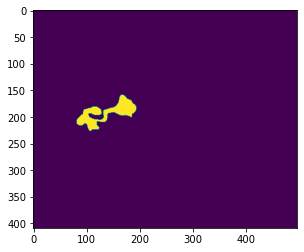

In [178]:
img = Image.new('L', (width, height), 0)
ImageDraw.Draw(img).polygon(points, outline=1, fill=1)
mask = np.array(img)
plt.imshow(mask)

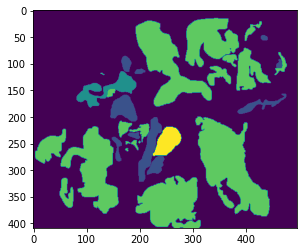

In [210]:
annotations = tree.getroot().findall("./ndpviewstate/annotation")
polymask = Image.new('L', (width, height), 0)
colormap = {"#ff0000": 1,
                    "#ffff00": 2,
                    "#00ff00": 3,
                    "#0000ff": 4,
                    "#000000": 5,
                    "#ff00ff": 6,
                    "#00ffff": 7,
                    "#ffffff": 8}


for annotation in annotations:
    if annotation.attrib['displayname'] == 'AnnotateFreehand':
        color = colormap[annotation.attrib['color']]
        
        points = []
        for point in annotation.findall("./pointlist/point"):
            x = nm2pixX(int(point.findall("./x")[0].text))
            y = nm2pixY(int(point.findall("./y")[0].text))
            points.append((x,y))
        
        ImageDraw.Draw(polymask).polygon(points, outline=color, fill=color)

mask = np.array(polymask)
plt.imshow(mask)

# Testing annotation reading

In [1]:
from wsi_handler import WSIHandler
import matplotlib.pyplot as plt

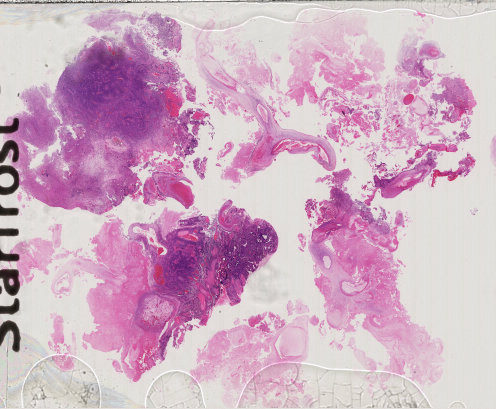

In [2]:
path = r"F:\GBMatch-DL\GBMatch_histo_lib_complete\Primary OP\pat_001_1_N1168-05A_histo.ndpi"
wsi = WSIHandler(path)
wsi.get_thumbnail()

In [3]:
ndpa_mask = wsi.read_ndpa()

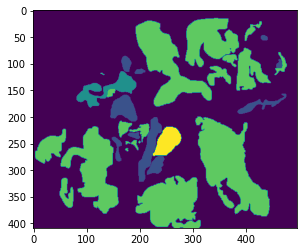

In [4]:
plt.imshow(ndpa_mask)

# Combining the masks

In [1]:
from wsi_handler import WSIHandler
import matplotlib.pyplot as plt

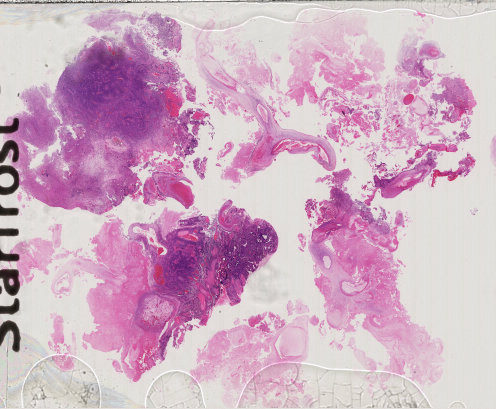

In [2]:
path = r"F:\GBMatch-DL\GBMatch_histo_lib_complete\Primary OP\pat_001_1_N1168-05A_histo.ndpi"
wsi = WSIHandler(path)
wsi.get_thumbnail()

In [3]:
ndpa_mask = wsi.read_ndpa()
segmented_mask = wsi.segment_tissue()

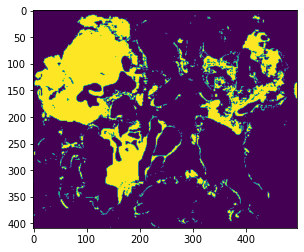

In [4]:
mask = segmented_mask.copy()
mask[ndpa_mask > 0] = False
plt.imshow(mask)

# Testing combined mask

In [1]:
from wsi_handler import WSIHandler
import matplotlib.pyplot as plt

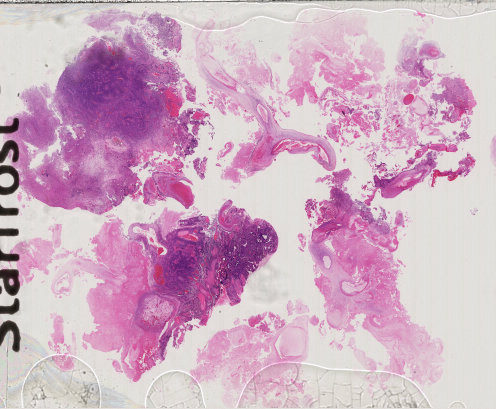

In [2]:
path = r"F:\GBMatch-DL\GBMatch_histo_lib_complete\Primary OP\pat_001_1_N1168-05A_histo.ndpi"
wsi = WSIHandler(path)
wsi.get_thumbnail()

In [3]:
wsi.obtain_tissue_mask()

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

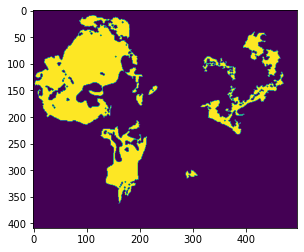

In [4]:
plt.imshow(wsi.tissue_mask)

# Create masks for all slides

In [1]:
from wsi_handler import WSIHandler
import openslide
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
ndpi_path = r'F:\GBMatch-DL\GBMatch_histo_lib_complete\Primary OP'
output_path = r'F:\GBMatch-DL\GBMatch_histo_lib_complete\Primary OP\tissue_masks'

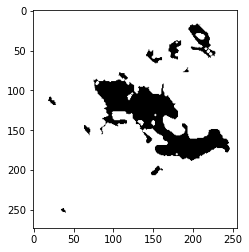

In [3]:
for root, dirs, files in os.walk(ndpi_path):
    for f in files:
        if f.endswith('.ndpi'):
            path = '\\'.join([root, f])
            wsi = WSIHandler(path)
            plt.imshow(wsi.obtain_tissue_mask(), cmap='Greys')
            
            output_filename_png= '\\'.join([output_path, 'png', f.replace('.ndpi', '.png')])
            output_filename_ndy= '\\'.join([output_path, 'numpy', f.replace('.ndpi', '')])
            plt.savefig(output_filename_png)
            np.save(output_filename_ndy, wsi.tissue_mask)

# Reducing the size to match 256px tiles on 20x magnification

In [7]:
import numpy as np

In [13]:
wsi.tissue_mask.shape

(273, 256)

In [14]:
np.array(wsi.WSI.dimensions)/2/256

array([128. , 136.5])

In [ ]:
# decided to work with erosion instead because of non-int shape of downsampled images

In [8]:
np.save(output_filename.replace('png', ''), wsi.tissue_mask)

# Draw random tissue samples using the tissue masks

In [5]:
from wsi_handler import WSIHandler
import openslide
import matplotlib.pyplot as plt
import os
import numpy as np
import time

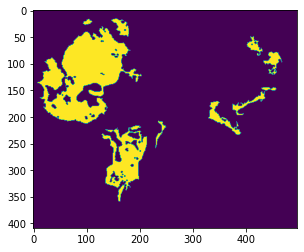

In [6]:
path = r'F:\GBMatch-DL\GBMatch_histo_lib_complete\Primary OP\pat_001_1_N1168-05A_histo.ndpi'
wsi = WSIHandler(path)
tissue_mask = wsi.load_tissue_mask()
plt.imshow(tissue_mask)

In [7]:
tissue_mask[0,0]

False

In [8]:
coordinates = np.argwhere(tissue_mask)
coordinates

array([[ 16, 154],
       [ 16, 155],
       [ 16, 156],
       ...,
       [358, 161],
       [358, 162],
       [358, 163]], dtype=int64)

In [9]:
rng = np.random.default_rng()
coords = rng.choice(coordinates)
coords

array([ 61, 123], dtype=int64)

[31488 15616]
[ 61 123]


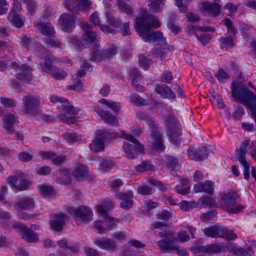

In [11]:
#rng = np.random.default_rng()
#coords = rng.choice(coordinates).T
loc = np.flip(coords * 256)
print(loc)
print(coords)
#level = wsi.WSI.get_best_level_for_downsample(1)
size = (256, 256)
wsi.WSI.read_region(loc, 1, size)

In [12]:
size = (256, 256)
rng = np.random.default_rng()
path = r'D:\Users\Tom\Desktop\muell\test2'

for i in range(100):
    coords = rng.choice(coordinates)
    loc = np.flip(coords * 256)
    image = wsi.WSI.read_region(loc, 1, size)
    save_path = '\\'.join([path, str(i) + '.png'])
    image.save(save_path)

In [121]:
float("40")

40.0

In [19]:
np.random.choice(256, 2) + loc

array([23592, 50938], dtype=int64)

In [100]:
20/0.15625

128.0

# Testing obtain_random_tile

In [1]:
from wsi_handler import WSIHandler
import matplotlib.pyplot as plt
import time

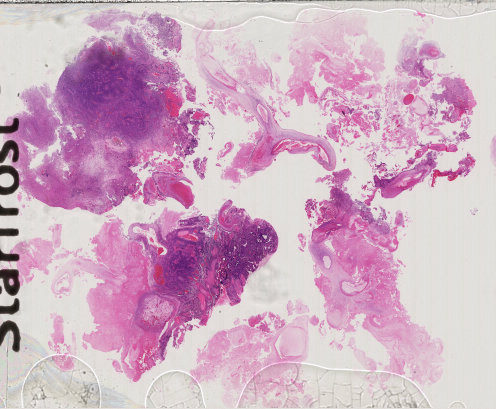

In [2]:
path = r"F:\GBMatch-DL\GBMatch_histo_lib_complete\Primary OP\pat_001_1_N1168-05A_histo.ndpi"
wsi = WSIHandler(path)
wsi.get_thumbnail()

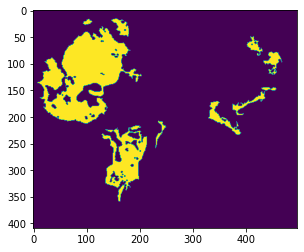

In [3]:
wsi.load_tissue_mask()
plt.imshow(wsi.tissue_mask)

0.16899800300598145


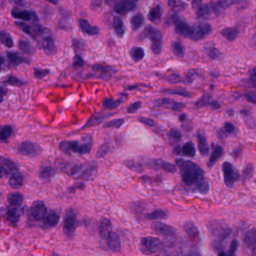

In [15]:
start = time.time()
tile = wsi.get_random_tile()
end = time.time()
print(end-start)
tile